Proposed Trading Strategy
-----

We test our strategy on a few models. We assume practically no latency (~1 nanosecond) in the tests below.

In [1]:
import pandas as pd
import numpy as np
import os
import math
import sys
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sys.path.insert(0, os.path.join(os.getcwd(), 'code'))

import OrderBook as ob
import OrderUtil as ou
import TradingStrategySimulator as tss


In [2]:
#load in intc OrderBook data
book = ob.OrderBook(message_filename='INTC_message.csv', orderbook_filename='INTC_OrderBook.csv')

100% Accuracy
--------
Here we use an ideal 100% accurate model to see whether or not our strategy can be profitable

In [3]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, next_move=True)
midprice_df.dropna(inplace=True)
backtester = tss.BacktesterSimulator(book=book, midprice_df=midprice_df, strategy=strat,
                                     max_exposure_dict={1:1, -1:1}, accuracy_rate=1,
                                     tick_size=100)
backtester.run_strategy_simulation()


Current time:            35004.165325977
Current cumulative pnl:  0.0
Current time:            35346.302228164
Current cumulative pnl:  1000.0
Current time:            35683.574315923
Current cumulative pnl:  1900.0
Current time:            36004.676315666
Current cumulative pnl:  2700.0
Current time:            36220.624942718
Current cumulative pnl:  3600.0
Current time:            36507.113394756
Current cumulative pnl:  4100.0
Current time:            37123.126168205
Current cumulative pnl:  4900.0
Current time:            37568.316281126004
Current cumulative pnl:  5200.0
Current time:            38169.133375705
Current cumulative pnl:  5300.0
Current time:            38754.000484555
Current cumulative pnl:  5900.0
Current time:            39440.59777616
Current cumulative pnl:  6000.0
Current time:            39803.404938539
Current cumulative pnl:  6200.0
Current time:            40205.605567611005
Current cumulative pnl:  6700.0
Current time:            40614.581165504
Current 

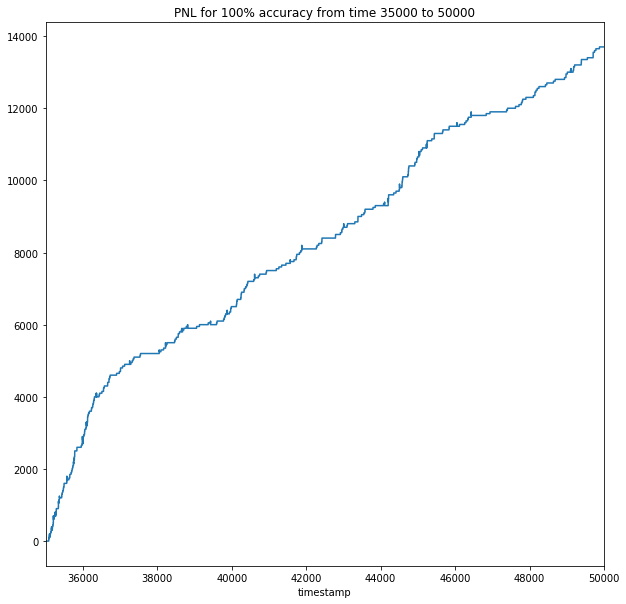

In [4]:
pnls = backtester._strategy_simulator.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL for 100% accuracy from time 35000 to 50000')
plt.show()

60% Accuracy
---------
Here we test a hypothetical model that has an average of 60% out of sample accuracy

Note that this model does not trade so often since the signal keeps changing directiod and thus most of the time we end up closing our positions relatvely quickly. When we do trade here the model does perform well.

In [5]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, next_move=True)
midprice_df.dropna(inplace=True)

backtester = tss.BacktesterSimulator(book=book, midprice_df=midprice_df, strategy=strat,
                                     max_exposure_dict={1:1, -1:1}, accuracy_rate=0.60,
                                     tick_size=100)
backtester.run_strategy_simulation()

Current time:            35004.165325977
Current cumulative pnl:  0.0
Current time:            35346.302228164
Current cumulative pnl:  500.0
Current time:            35683.574315923
Current cumulative pnl:  600.0
Current time:            36004.676315666
Current cumulative pnl:  700.0
Current time:            36220.624942718
Current cumulative pnl:  800.0
Current time:            36507.113394756
Current cumulative pnl:  900.0
Current time:            37123.126168205
Current cumulative pnl:  1100.0
Current time:            37568.316281126004
Current cumulative pnl:  1200.0
Current time:            38169.133375705
Current cumulative pnl:  1200.0
Current time:            38754.000484555
Current cumulative pnl:  1200.0
Current time:            39440.59777616
Current cumulative pnl:  1300.0
Current time:            39803.404938539
Current cumulative pnl:  1400.0
Current time:            40205.605567611005
Current cumulative pnl:  1300.0
Current time:            40614.581165504
Current cumul

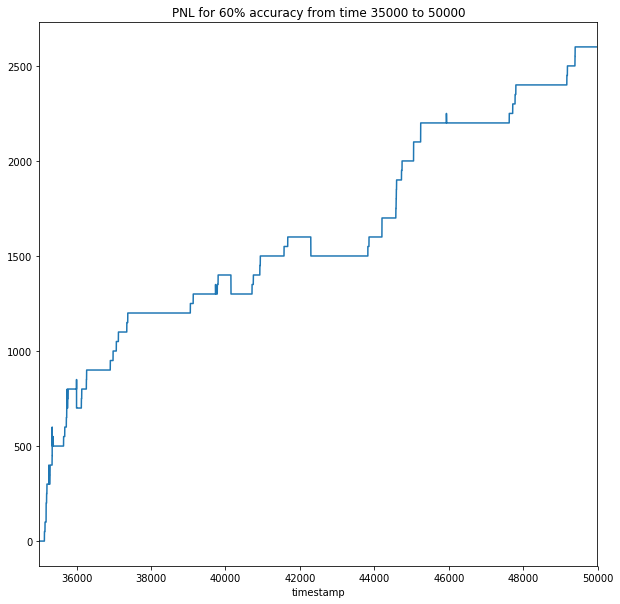

In [6]:
pnls = backtester._strategy_simulator.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL for 60% accuracy from time 35000 to 50000')
plt.show()

Strategy Tested Using Simple Prediction Model
--------
When bid level 1 quantity is greater than or equal to ask level 1 quantity we predict an up move, otherwise we predict a down move.

This model serves as a sanity check, as we do not expect good performance here.

In [7]:
strat = {1: ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5]),
         -1 : ([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])}
midprice_df = book.get_midprice_data(numupdates=1, t_start=35000, t_end=50000, next_move=True)
midprice_df.dropna(inplace=True)
pred = (midprice_df['bq1'] >= midprice_df['aq1']).astype(int)
pred = 2.0*(pred - 0.5)
midprice_df['y_predict'] = pred
backtester = tss.TradingStrategyBacktester(book=book, midprice_df=midprice_df, strategy=strat,
                                           max_exposure_dict={1:1, -1:1}, 
                                           tick_size=100)
backtester.run_strategy()

Current time:            35004.165325977
Current cumulative pnl:  0.0
Current time:            35346.302228164
Current cumulative pnl:  -1000.0
Current time:            35683.574315923
Current cumulative pnl:  -1200.0
Current time:            36004.676315666
Current cumulative pnl:  -1800.0
Current time:            36220.624942718
Current cumulative pnl:  -2100.0
Current time:            36507.113394756
Current cumulative pnl:  -2000.0
Current time:            37123.126168205
Current cumulative pnl:  -2000.0
Current time:            37568.316281126004
Current cumulative pnl:  -2600.0
Current time:            38169.133375705
Current cumulative pnl:  -2600.0
Current time:            38754.000484555
Current cumulative pnl:  -2600.0
Current time:            39440.59777616
Current cumulative pnl:  -2700.0
Current time:            39803.404938539
Current cumulative pnl:  -2600.0
Current time:            40205.605567611005
Current cumulative pnl:  -3000.0
Current time:            40614.581165

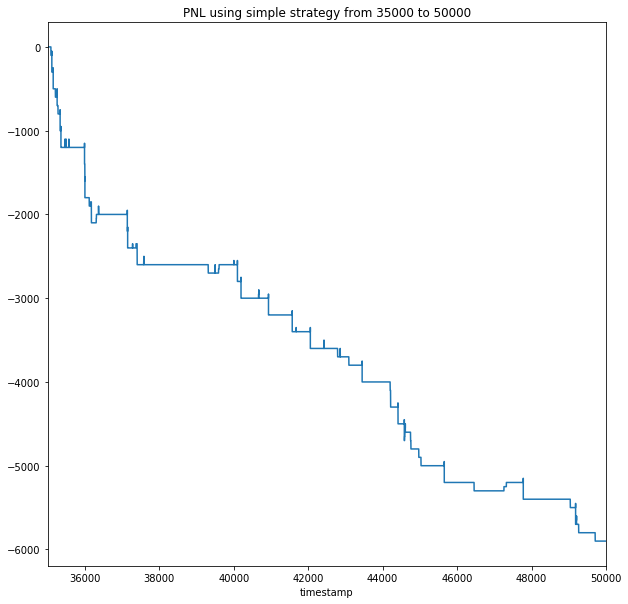

In [8]:
pnls = backtester.get_pnl_series()
pnls.cumsum().plot()
plt.title('PNL using simple strategy from 35000 to 50000')
plt.show()